In [20]:
import numpy as np
import matplotlib.pyplot as plt
from .gnetic import Gen1

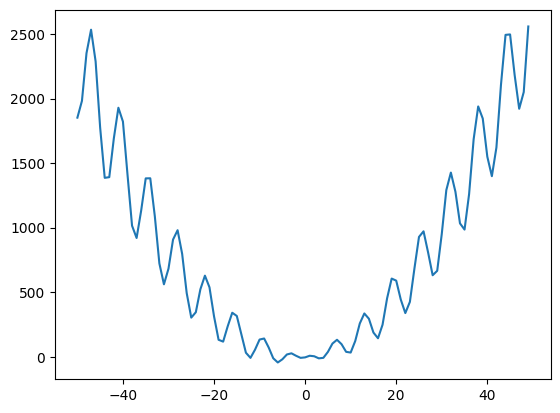

In [7]:
def function_a(x):
    x=x[0]
    return x*x+3*x-5+np.sqrt(np.sqrt(x**2))+5*np.sin(x-5)*2*x

a = 50
X =[i for i in range(-a,a)]
Y =[function_a([x]) for x in X]

plt.plot(X,Y)

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 1 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a]] # searching intervals for the solution

# Experiment
experiment = Gen1(function_a ,input_size, bounds, model_par)

No handles with labels found to put in legend.


gen_0 [[-48], [-37], [-28], [-10], [-6], [5], [13], [24], [35], [41]]


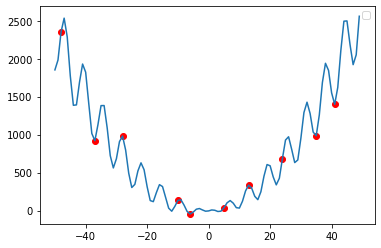

In [4]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

print("gen_0", gen_0)
plt.scatter(gen_0,[function_a(x) for x in gen_0] , c='r')
plt.plot(X,Y)
plt.legend()

clone_family: [[[-48], [-45], [-42], [-46], [-48], [-47]], [[-37], [-40], [-43], [-39], [-35], [-43]], [[-28], [-31], [-24], [-32], [-23], [-19]], [[-10], [-7], [-10], [-12], [-4], [-8]], [[-6], [-1], [-10], [-3], [-13], [-3]], [[5], [0], [-1], [-3], [12], [8]], [[13], [16], [15], [14], [11], [13]], [[24], [24], [26], [26], [22], [31]], [[35], [27], [37], [30], [38], [37]], [[41], [44], [39], [42], [36], [36]]]
c_dist: [[-48], [-45], [-42], [-46], [-48], [-47], [-37], [-40], [-43], [-39], [-35], [-43], [-28], [-31], [-24], [-32], [-23], [-19], [-10], [-7], [-10], [-12], [-4], [-8], [-6], [-1], [-10], [-3], [-13], [-3], [5], [0], [-1], [-3], [12], [8], [13], [16], [15], [14], [11], [13], [24], [24], [26], [26], [22], [31], [35], [27], [37], [30], [38], [37], [41], [44], [39], [42], [36], [36]]


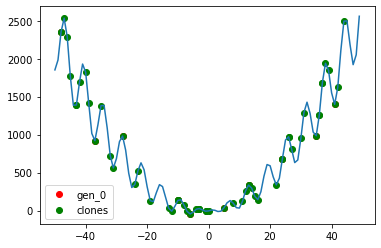

In [5]:
# mutation_1 

clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(gen_0,[function_a(x) for x in gen_0] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[-42], [-37], [-19], [-7], [-6], [-1], [11], [22], [27], [36]]


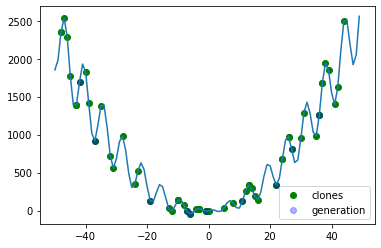

In [6]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()

new genration: [[15], [-6], [-24], [-24], [14], [-3], [-3], [-24], [-24], [-42]]


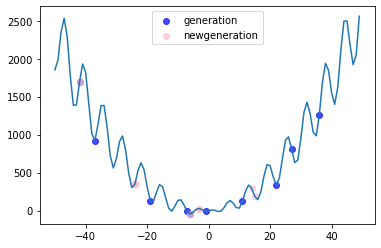

In [7]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.legend()

clone_family: [[[15], [13], [4], [17], [18], [11]], [[-6], [-5], [-3], [-5], [-1], [-5]], [[-24], [-26], [-26], [-25], [-27], [-16]], [[-24], [-19], [-26], [-19], [-28], [-22]], [[14], [21], [9], [13], [14], [13]], [[-3], [-7], [-6], [-1], [1], [4]], [[-3], [-9], [-3], [-5], [-1], [-5]], [[-24], [-23], [-22], [-25], [-25], [-23]], [[-24], [-25], [-21], [-24], [-25], [-20]], [[-42], [-37], [-43], [-35], [-45], [-34]]]
c_dist: [[15], [13], [4], [17], [18], [11], [-6], [-5], [-3], [-5], [-1], [-5], [-24], [-26], [-26], [-25], [-27], [-16], [-24], [-19], [-26], [-19], [-28], [-22], [14], [21], [9], [13], [14], [13], [-3], [-7], [-6], [-1], [1], [4], [-3], [-9], [-3], [-5], [-1], [-5], [-24], [-23], [-22], [-25], [-25], [-23], [-24], [-25], [-21], [-24], [-25], [-20], [-42], [-37], [-43], [-35], [-45], [-34]]


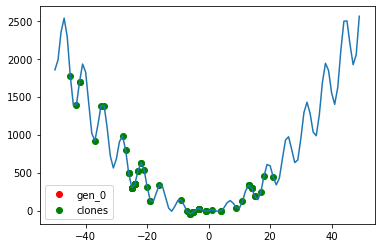

In [8]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(new_generation,[function_a(x) for x in new_generation] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[4], [-6], [-25], [-19], [9], [-6], [-5], [-25], [-25], [-37]]


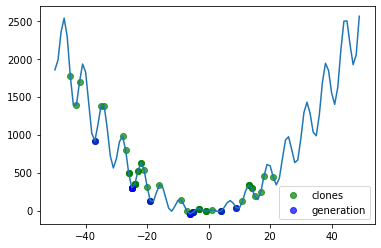

In [9]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones', alpha=0.7)
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.plot(X,Y)
plt.legend()

new genration: [[-16], [-12], [-1], [-1], [-22], [-10], [-10], [-8], [-8], [4]]


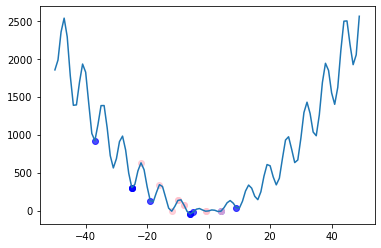

In [10]:
# reproduction_3

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)

clone_family: [[[-16], [-13], [-22], [-17], [-17], [-19]], [[-12], [-14], [-14], [-12], [-7], [-12]], [[-1], [-5], [-4], [-3], [-3], [-5]], [[-1], [-3], [-8], [-4], [-1], [4]], [[-22], [-22], [-29], [-23], [-28], [-29]], [[-10], [-6], [-4], [-18], [-14], [-9]], [[-10], [-11], [-10], [-8], [-12], [-5]], [[-8], [-13], [-6], [-6], [-10], [-8]], [[-8], [-7], [-3], [-9], [-15], [-7]], [[4], [7], [7], [4], [12], [6]]]
c_dist: [[-16], [-13], [-22], [-17], [-17], [-19], [-12], [-14], [-14], [-12], [-7], [-12], [-1], [-5], [-4], [-3], [-3], [-5], [-1], [-3], [-8], [-4], [-1], [4], [-22], [-22], [-29], [-23], [-28], [-29], [-10], [-6], [-4], [-18], [-14], [-9], [-10], [-11], [-10], [-8], [-12], [-5], [-8], [-13], [-6], [-6], [-10], [-8], [-8], [-7], [-3], [-9], [-15], [-7], [4], [7], [7], [4], [12], [6]]


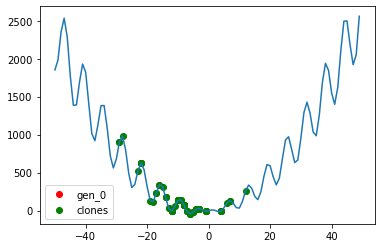

In [11]:
# mutation_3

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(new_generation,[function_a(x) for x in (new_generation)] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[-13], [-7], [-5], [-1], [-23], [-6], [-5], [-6], [-7], [4]]


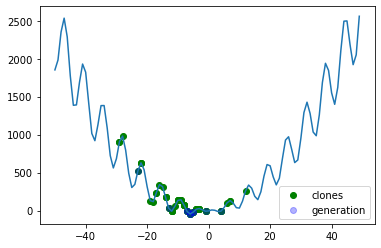

In [12]:
# kill_3

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()

new genration: [[2], [-3], [-7], [-7], [0], [-4], [-4], [-9], [-9], [-13]]


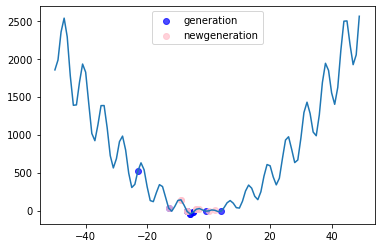

In [13]:
# reproduction_3
new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.legend()

Epochs 0/3
Evolution process ended!
Last generation: [[-4], [-16], [-36], [-36], [16], [-4], [-4], [-16], [-16], [-36]]
Epochs 1/3
Evolution process ended!
Last generation: [[-6], [-4], [-4], [-4], [-8], [-8], [-8], [-6], [-6], [-6]]
Epochs 2/3
Evolution process ended!
Last generation: [[-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6], [-6]]


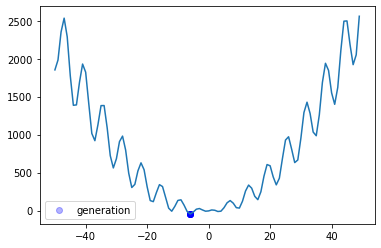

In [14]:
## Automate evolution

nr_epochs = 3
last_generation = experiment.evolve(nr_epochs)
fit = [function_a(x) for x in last_generation] 
plt.scatter(last_generation, fit , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()